# An√°lise dos Diferentes Canais de Comunica√ß√£o e o Seu Impacto nas Vendas

Este trabalho est√° a ser realizado no √¢mbito da Unidade Currricular de Complementos de Estat√≠stica para Ci√™ncia de Dados.

Identifica√ß√£o do grupo (n¬∫ 11): 

* Catarina Juliana Martins Auxiliar	2021134297
  
* Diogo Sousa Machado	2020153309
  
* Jo√£o Xavier da Silva Leal	2021130506


Com o acompanhameno do professor Francisco Jos√© Nibau Antunes.

**Fonte dos dados:** https://www.kaggle.com/datasets/yakhyojon/marketing-promotion/data?select=marketing_sales_data.csv

**Contexto:** O dataset relaciona marketing e vendas, onde diferentes canais de marketing s√£o usados para impulsionar as vendas de um produto ou servi√ßo. Ele pode ser usado para analisar o impacto de investimentos em diversos canais e tipos de influenciadores digitais nas vendas.

**Conte√∫do:**
O dataset cont√©m as seguintes colunas:

**`TV`:** Indica o n√≠vel de investimento em propagandas televisivas;

**`Radio`:** Representa o gasto em publicidade no r√°dio (num√©rica cont√≠nua). Valores variam entre 0 e 42;

**`Social Media`:** Indica o investimento em publicidade nas m√≠dias sociais (num√©rica cont√≠nua). Valores variam entre 0 e 11;

**`Influencer`:** Refere-se ao tipo de influenciador contratado para promover os produtos;

**`Sales`:** Representa o total de vendas geradas (vari√°vel num√©rica cont√≠nua), que pode ser usada como a vari√°vel-alvo (dependente) para modelagem preditiva.

**Objetivo:**

O objetivo deste trabalho √© analisar os diferentes canais de comunica√ß√£o utilizados em campanhas de marketing (TV, R√°dio, M√≠dias Sociais e Influenciadores) e avaliar o impacto desses investimentos nas vendas. Por meio dessa an√°lise, pretende-se identificar quais estrat√©gias de comunica√ß√£o s√£o mais eficazes e como os recursos podem ser otimizados para maximizar os resultados de vendas.

A troca de dataset nesta fase do trabalho foi motivada pelo facto de no primeiro trabalho ter sido utilizado um dataset com demasiadas vari√°veis categ√≥ricas, deste modo optamos por encontrar um dataset maioritariamente com vari√°veis num√©ricas de forma a que a aplica√ß√£o do algoritmo k-NN seja mais eficiente.

Outro motivo pela escolha deste dataset simples e sem muitos problemas de estrutura foi o facto de nenhum dos elementos do grupo ter experi√™ncia pr√©via na √°rea de an√°lise de dados, pelo que este foi o primeiro projeto realizado e apesar de ter sido testado um dataset mais complexo, opt√°mos por preferir trocar para este mais simples de forma a que fosse mais f√°cil compreender o trabalho que realiz√°mos.

# Pre√¢mbulo

In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 1. Importa√ß√£o de dados

In [6]:
df = pd.read_csv("marketing_sales_data.csv")

# 2. Visualiza√ß√£o dos dados iniciais e EDA

Nesta etapa vai ser feita uma an√°lise inicial de forma a perceber quais as vari√°veis em estudo, o tipo de dado que temos e as suas estat√≠sticas de forma a perceber quais ser√£o os passos seguintes. Tamb√©m ser√£o feitas as corre√ß√µes necess√°rias para a continua√ß√£o do estudo.

In [9]:
df

TV      Radio  Social Media Influencer       Sales
0       Low   3.518070      2.293790      Micro   55.261284
1       Low   7.756876      2.572287       Mega   67.574904
2      High  20.348988      1.227180      Micro  272.250108
3    Medium  20.108487      2.728374       Mega  195.102176
4      High  31.653200      7.776978       Nano  273.960377
..      ...        ...           ...        ...         ...
567  Medium  14.656633      3.817980      Micro  191.521266
568    High  28.110171      7.358169       Mega  297.626731
569  Medium  11.401084      5.818697       Nano  145.416851
570  Medium  21.119991      5.703028      Macro  209.326830
571     Low  13.221237      3.660566      Micro  135.773151

[572 rows x 5 columns]

In [10]:
df.head()

TV      Radio  Social Media Influencer       Sales
0     Low   3.518070      2.293790      Micro   55.261284
1     Low   7.756876      2.572287       Mega   67.574904
2    High  20.348988      1.227180      Micro  272.250108
3  Medium  20.108487      2.728374       Mega  195.102176
4    High  31.653200      7.776978       Nano  273.960377

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            572 non-null    object 
 1   Radio         572 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         572 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [12]:
df.describe()

Radio  Social Media       Sales
count  572.000000    572.000000  572.000000
mean    17.520616      3.333803  189.296908
std      9.290933      2.238378   89.871581
min      0.109106      0.000031   33.509810
25%     10.699556      1.585549  118.718722
50%     17.149517      3.150111  184.005362
75%     24.606396      4.730408  264.500118
max     42.271579     11.403625  357.788195

In [13]:
(df
 .filter(['TV','Influencer'])
 .astype('object')
 .describe()
 )

TV Influencer
count      572        572
unique       3          4
top     Medium       Nano
freq       205        157

In [14]:
df.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

**Coment√°rios:**

1. Pela tabela info conseguimos concluir que 3 em 5 vari√°veis s√£o num√©ricas, logo vai ser aplicado um m√©todo para substituir os valores categ√≥ricos por num√©ricos para as vari√°veis `TV` e `Influencer`.
2. Na descri√ß√£o dos dados tanto para a tabela num√©rica como para a nominal parece existir coer√™ncia entre os dados, conseguimos concluir que os registos est√£o completos (572 para todas as vari√°veis) e parece existir equilibrio entre a m√©dia e o desvio padr√£o.
3. N√£o existem valores nulos no dataset, facilitando assim a limpeza.

## 2.1 Corre√ß√£o de formatos e limpeza

**Substitui√ß√£o dos valores categ√≥ricos**

A vari√°vel **`TV`** est√° distribuida em 3 categorias: Low, Medium e High. Uma vez que n√£o temos dados para o intervalo de valores entre cada categoria decidimos aplicar um intervalo de valores atrav√©s da informa√ß√£o que temos relativamente √†s outras vari√°veis, no caso vamos utilizar a m√©dia das vari√°veis **`Radio`** e **`Influencer`** como refer√™ncia. Al√©m disso temos informa√ß√£o sobre a distribui√ß√£o dos valores nas suas categorias (Low: 201 registos; Medium: 205 registos; High: 166 registos) Sendo assim escolhemos os seguintes valores:

* Low = [1, 6[
* Medium = [7, 13[
* High = [14, 19]

Para a vari√°vel **`Influencer`** faremos o mesmo procedimento com a diferen√ßa de que as categorias estarem divididas em quatro e temos tamb√©m a distribui√ß√£o (Nano: 157 registos; Micro: 151 registos; Mega: 137 registos; Macro: 127 registos), sendo assim, os intervalos s√£o os seguintes:

* Nano = [1,5[
* Micro = [6, 10[
* Mega = [11, 15[
* Macro = [16, 20] 

In [18]:
# distribui√ß√£o de registos por vari√°vel categ√≥rica:

categorical_columns = ['TV', 'Influencer']
print("\nValores √∫nicos por vari√°vel categ√≥rica:")
for col in categorical_columns:
    print(f"\n{col}: {df[col].nunique()} valores √∫nicos")
    print(df[col].value_counts().head())


Valores √∫nicos por vari√°vel categ√≥rica:

TV: 3 valores √∫nicos
TV
Medium    205
Low       201
High      166
Name: count, dtype: int64

Influencer: 4 valores √∫nicos
Influencer
Nano     157
Micro    151
Mega     137
Macro    127
Name: count, dtype: int64


In [19]:
tv_intervals = {
    "Low": (1, 6),
    "Medium": (7, 13),
    "High": (14, 19)
}

influencer_intervals = {
    'Nano': (1, 5), 
    'Micro': (6, 10), 
    'Mega': (11, 15), 
    'Macro': (16, 21)
}

def generate_random_discrete_values(df, column, intervals):
    generated_values = []
    for category, count in df[column].value_counts().items():
        interval = intervals[category]
        values = np.random.randint(interval[0], interval[1] + 1, size=count)
        generated_values.extend(values)
    np.random.shuffle(generated_values)  # Mistura os valores para evitar padr√µes
    return generated_values

df['TV_numeric'] = generate_random_discrete_values(df, 'TV', tv_intervals)
df['Influencer_numeric'] = generate_random_discrete_values(df, 'Influencer', influencer_intervals)

In [20]:
df.describe()

Radio  Social Media       Sales  TV_numeric  Influencer_numeric
count  572.000000    572.000000  572.000000  572.000000          572.000000
mean    17.520616      3.333803  189.296908    9.699301           10.155594
std      9.290933      2.238378   89.871581    5.532309            6.010958
min      0.109106      0.000031   33.509810    1.000000            1.000000
25%     10.699556      1.585549  118.718722    5.000000            5.000000
50%     17.149517      3.150111  184.005362   10.000000           10.000000
75%     24.606396      4.730408  264.500118   15.000000           15.000000
max     42.271579     11.403625  357.788195   19.000000           21.000000

In [21]:
print(df.dtypes)

TV                     object
Radio                 float64
Social Media          float64
Influencer             object
Sales                 float64
TV_numeric              int32
Influencer_numeric      int32
dtype: object


## TAREFA 1 - Sele√ß√£o Manual de Vari√°veis

O objetivo deste passo √© escolher as vari√°veis mais relevantes para a an√°lise, evitando incluir vari√°veis redundantes, irrelevantes ou que possam introduzir ru√≠do, ajudando assim a melhorar a qualidade e a efici√™ncia do modelo. Deste modo, esta tarefa apresenta a visualiza√ß√£o da distribui√ß√£o das vari√°veis mas tamb√©m a matriz de correla√ß√£o entre elas. No final da tarefa est√£o incluidas as decis√µes tomadas.

### 1.1 Distribui√ß√£o de vari√°veis num√©ricas


Distribui√ß√£o das vari√°veis num√©ricas:

An√°lise da vari√°vel: Radio
count    572.000000
mean      17.520616
std        9.290933
min        0.109106
25%       10.699556
50%       17.149517
75%       24.606396
max       42.271579
Name: Radio, dtype: float64


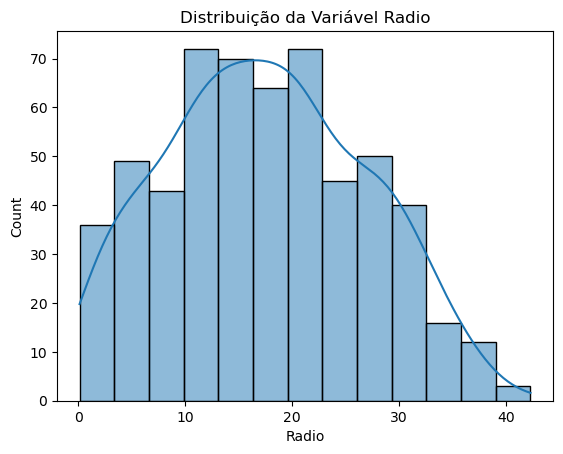


An√°lise da vari√°vel: Social Media
count    572.000000
mean       3.333803
std        2.238378
min        0.000031
25%        1.585549
50%        3.150111
75%        4.730408
max       11.403625
Name: Social Media, dtype: float64


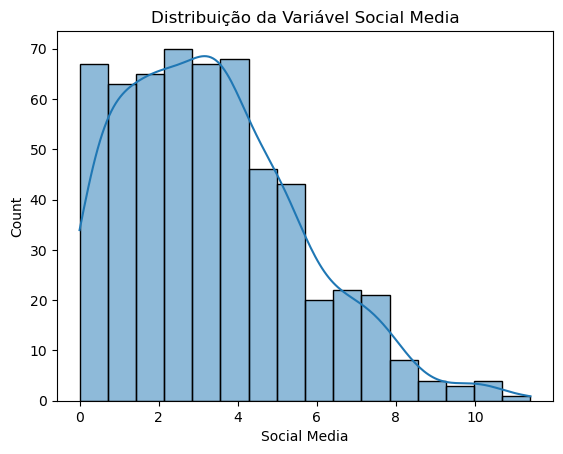


An√°lise da vari√°vel: Sales
count    572.000000
mean     189.296908
std       89.871581
min       33.509810
25%      118.718722
50%      184.005362
75%      264.500118
max      357.788195
Name: Sales, dtype: float64


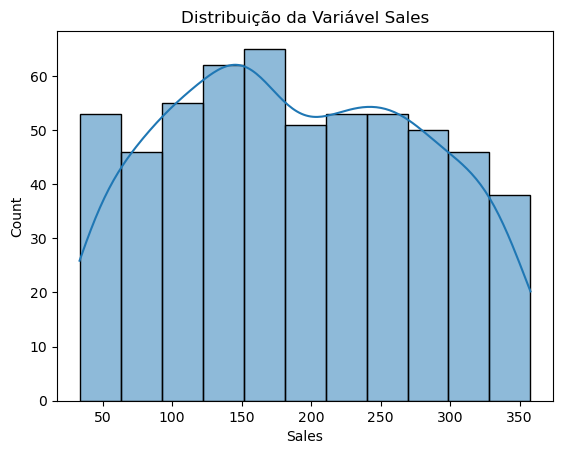


An√°lise da vari√°vel: TV_numeric
count    572.000000
mean       9.699301
std        5.532309
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       19.000000
Name: TV_numeric, dtype: float64


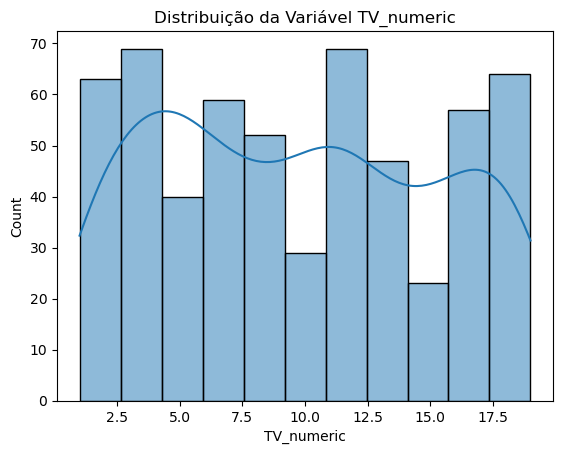


An√°lise da vari√°vel: Influencer_numeric
count    572.000000
mean      10.155594
std        6.010958
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       21.000000
Name: Influencer_numeric, dtype: float64


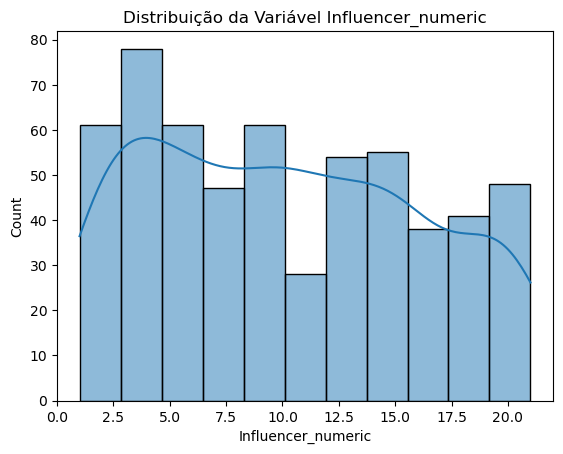

In [25]:
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
print("\nDistribui√ß√£o das vari√°veis num√©ricas:")
for col in numeric_columns:
    print(f"\nAn√°lise da vari√°vel: {col}")
    print(df[col].describe())
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribui√ß√£o da Vari√°vel {col}')
    plt.show()

**An√°lise:**

* Radio:
  * A distribui√ß√£o √© quase sim√©trica, mas n√£o perfeitamente normal.
  * O valor m√©dio est√° em torno de 17.52, com um desvio padr√£o de 9.29.
  * Os dados est√£o concentrados no intervalo de 0 a 40, com algumas varia√ß√µes, sem aparentar valores muito discrepantes.
    
* Social Media:
  * Esta vari√°vel apresenta uma distribui√ß√£o assim√©trica, com uma cauda longa √† direita (right-skewed).
  * A m√©dia (3.33) √© maior que a mediana (3.15), indicando essa assimetria.
  * A maior parte dos valores est√° concentrada entre 0 e 6, com alguns valores elevados fora desse intervalo, mas n√£o excessivamente extremos.
    
* Sales:
  * Esta vari√°vel revela ter uma distribui√ß√£o relativamente uniforme ou bimodal, com picos em diferentes regi√µes.
  * A m√©dia (189.30) e a mediana (184.00) est√£o pr√≥ximas, o que indica uma distribui√ß√£o mais equilibrada.
  * O intervalo vai de aproximadamente 30 a 360, mas a concentra√ß√£o principal est√° entre 100 e 300. 

* TV_numeric:

  * A distribui√ß√£o √© uniforme, com algumas oscila√ß√µes e picos observados em intervalos espec√≠ficos.
  * A m√©dia est√° em torno de 9.70, com um desvio padr√£o de 5.53.
  * Os dados est√£o concentrados no intervalo de 1 a 19, sem valores extremamente discrepantes ou fora do esperado.

* Influencer_numeric:
  * Esta vari√°vel apresenta uma distribui√ß√£o levemente assim√©trica, com uma concentra√ß√£o maior em intervalos mais baixos.
  * A m√©dia (10.15) √© pr√≥xima da mediana (10.00), indicando que a assimetria √© m√≠nima.
  * A maior parte dos valores est√° concentrada entre 5 e 15, com varia√ß√µes moderadas fora desse intervalo, mas sem valores extremamente elevados ou baixos.
    
 
**Conclus√µes:** 

* Para a imputa√ß√£o k-NN:
  * As vari√°veis `Radio`, `Sales` e `TV_numeric` apresentam distribui√ß√µes mais uniformes ou sim√©tricas, o que facilita a imputa√ß√£o de valores omissos, pois o algoritmo k-NN pode operar de maneira eficiente em vari√°veis cont√≠nuas.
  * Para `Social Media` e `Influencer_numeric` a assimetria pode introduzir alguma dificuldade na imputa√ß√£o, especialmente em valores mais extremos.
 
* Valores discrepantes:
  * Nenhuma das vari√°veis apresenta valores discrepantes que possam influenciar negativamente a imputa√ß√£o ou a an√°lise.

### 1.2 Matriz de correla√ß√£o das vari√°veis num√©ricas


Matriz de Correla√ß√£o:
                       Radio  Social Media     Sales  TV_numeric  \
Radio               1.000000      0.629941  0.858036   -0.106526   
Social Media        0.629941      1.000000  0.542048   -0.037818   
Sales               0.858036      0.542048  1.000000   -0.120213   
TV_numeric         -0.106526     -0.037818 -0.120213    1.000000   
Influencer_numeric  0.070587      0.014692  0.063225   -0.037193   

                    Influencer_numeric  
Radio                         0.070587  
Social Media                  0.014692  
Sales                         0.063225  
TV_numeric                   -0.037193  
Influencer_numeric            1.000000  


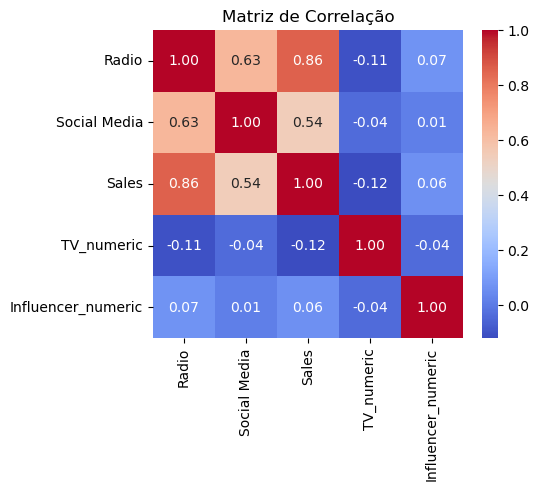

In [28]:
correlation_matrix = df[numeric_columns].corr()
print("\nMatriz de Correla√ß√£o:")
print(correlation_matrix)
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correla√ß√£o')
plt.show()

**An√°lise**

* Correla√ß√£o entre `Radio` e `Sales` (0.86):
  * Existe uma forte correla√ß√£o positiva entre essas vari√°veis. Isso significa que, √† medida que os valores da vari√°vel `Radio` aumentam, os valores de `Sales` tendem a aumentar de forma consistente.
  * Esta rela√ß√£o forte pode ser √∫til na imputa√ß√£o de valores omissos em qualquer uma das vari√°veis, pois `Radio` pode ser uma boa preditora para `Sales` e vice-versa.
 
* Correla√ß√£o entre `Social Media` e `Sales` (0.54):
  * H√° uma correla√ß√£o moderada entre `Social Media` e `Sales.` Embora a rela√ß√£o n√£o seja t√£o forte quanto a de `Radio` e `Sales,` ainda √© significativa.
  * `Social Media` pode contribuir na imputa√ß√£o para `Sales,` mas com menor precis√£o comparada √† vari√°vel `Radio.`
 
* Correla√ß√£o entre `Radio` e `Social Media` (0.63):
  * Existe uma correla√ß√£o moderada positiva entre essas vari√°veis. Isso indica que um aumento na vari√°vel `Radio` pode estar associado a um aumento em `Social Media,` embora essa rela√ß√£o seja mais fraca do que com `Sales.`
  * Essa rela√ß√£o pode ser explorada dependendo do contexto, mas n√£o √© t√£o preditiva quanto a rela√ß√£o entre `Radio` e `Sales.`

* Correla√ß√£o das vari√°veis `TV_numeric` e `Influencer_numeric` entre elas e com as restantes vari√°veis √© negativa. Uma vez que os valores das vari√°veis foram introduzidos de forma artificial, a aleatoriedade dos mesmos pode ter gerado falta de correla√ß√£o com as restantes vari√°veis.
 
**Conclus√µes:**
* Para imputa√ß√£o com k-NN:
  * A vari√°vel `Radio` √© altamente correlacionada com `Sales` e apresenta o maior potencial para ser utilizada como preditora na imputa√ß√£o de valores omissos.
  * `Social Media,` embora tenha uma correla√ß√£o moderada com `Sales` e `Radio,` deve ser utilizada como uma vari√°vel complementar na imputa√ß√£o, j√° que sua rela√ß√£o n√£o √© t√£o forte.
  * As vari√°veis `TV_numeric` e `Influencer_numeric` devem ser retiradas do estudo de forma a evitar problemas com as restantes vari√°veis

* Rela√ß√µes fortes e redund√¢ncia:
  * A alta correla√ß√£o entre `Radio` e `Sales` pode indicar redund√¢ncia, dependendo do contexto do problema. Contudo, para fins de imputa√ß√£o, essa rela√ß√£o √© ben√©fica.

In [30]:
# Existe reund√¢ncia elevada?

high_corr = np.where((correlation_matrix > 0.9) & (correlation_matrix < 1))
high_corr_pairs = [(numeric_columns[i], numeric_columns[j]) for i, j in zip(*high_corr)]

print("Pares de vari√°veis com alta correla√ß√£o:")
print(high_corr_pairs)

Pares de vari√°veis com alta correla√ß√£o:
[]


**Coment√°rio:**

Aplicamos este c√≥digo de forma a perceber se existe uma redund√¢ncia elevada. Como n√£o existem vari√°veis com correla√ß√£o maior que 0.9, ent√£o n√£o √© necess√°rio remover vari√°veis por redund√¢ncia. 

Deste modo, todas as vari√°veis podem ser mantidas para an√°lise, desde que sejam adequadas para o k-NN.  

### 1.3 Distribui√ß√£o das vari√°veis categ√≥ricas

In [33]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Vari√°veis categ√≥ricas com base no tipo de dado:")
print(categorical_columns)

Vari√°veis categ√≥ricas com base no tipo de dado:
Index(['TV', 'Influencer'], dtype='object')



Valores √∫nicos por vari√°vel categ√≥rica:

TV: 3 valores √∫nicos
TV
Medium    205
Low       201
High      166
Name: count, dtype: int64

Influencer: 4 valores √∫nicos
Influencer
Nano     157
Micro    151
Mega     137
Macro    127
Name: count, dtype: int64


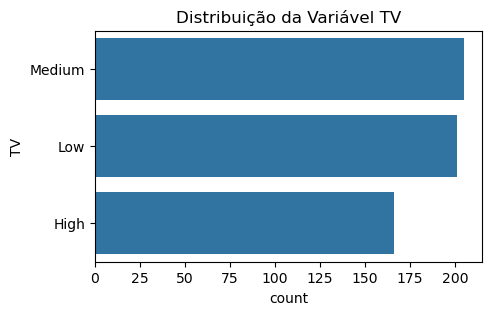

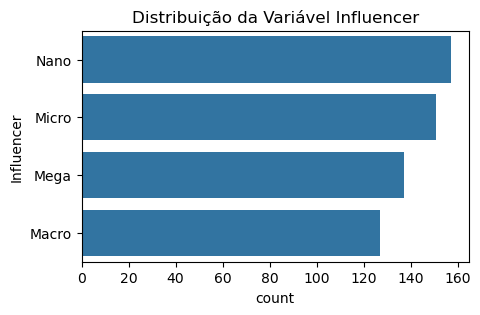

In [34]:
categorical_columns = ['TV', 'Influencer']
print("\nValores √∫nicos por vari√°vel categ√≥rica:")
for col in categorical_columns:
    print(f"\n{col}: {df[col].nunique()} valores √∫nicos")
    print(df[col].value_counts().head())

# Visualizamos a frequ√™ncia das categorias para melhor compreender sua distribui√ß√£o.
for col in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribui√ß√£o da Vari√°vel {col}')
    plt.show()

**An√°lise:**

* Distribui√ß√£o da vari√°vel TV:
  * A categoria "Medium" √© a mais frequente, seguida da categoria "Low" e depois "High."
  * A distribui√ß√£o √© relativamente equilibrada, mas "Medium" domina ligeiramente a distribui√ß√£o.
 

* Distribui√ß√£o da vari√°vel Influencer:
  * Nano √© a categoria mais frequente (157 ocorr√™ncias), seguida por Micro (151 ocorr√™ncias).
  * A diferen√ßa entre Nano e Macro √© de apenas 30 ocorr√™ncias, o que indica que a vari√°vel est√° razoavelmente distribu√≠da.
  * A distribui√ß√£o mostra que os tipos de influencers est√£o relativamente equilibrados.
 
* Coment√°rio:
  * Ambas as vari√°veis apresentam distribui√ß√µes razo√°veis, com poucas diferen√ßas entre as categorias. Isto √© positivo, pois distribui√ß√µes muito desequilibradas poderiam afetar a nossa an√°lise.
  * A vari√°vel "TV" tem um leve predom√≠nio de categorias m√©dias e baixas, o que pode influenciar an√°lises relacionadas a impacto ou alcance.
  * A vari√°vel "Influencer" indica uma tend√™ncia de representa√ß√£o maior de influencers menores (Nano e Micro), o que pode ser relevante para estrat√©gias centradas nesse tipo de p√∫blico.

### 1.4 Sele√ß√£o das vari√°veis

In [36]:
df = df.drop(columns=['TV_numeric', 'Influencer_numeric'])

In [37]:
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

In [38]:
variaveis_selecionadas = numeric_columns
print("\nVari√°veis selecionadas para imputa√ß√£o:")
print(variaveis_selecionadas)


Vari√°veis selecionadas para imputa√ß√£o:
Index(['Radio', 'Social Media', 'Sales'], dtype='object')


In [39]:
# Cria√ß√£o de um novo DataFrame com apenas vari√°veis num√©ricas
df_selecionado = df[variaveis_selecionadas].copy()
print("\nDataset ap√≥s sele√ß√£o de vari√°veis num√©ricas:")
print(df_selecionado.head())


Dataset ap√≥s sele√ß√£o de vari√°veis num√©ricas:
       Radio  Social Media       Sales
0   3.518070      2.293790   55.261284
1   7.756876      2.572287   67.574904
2  20.348988      1.227180  272.250108
3  20.108487      2.728374  195.102176
4  31.653200      7.776978  273.960377


# TAREFA 2 ‚Äì Sintetiza√ß√£o de Valores Omissos e Testagem de V√°rios Valores de k

A imputa√ß√£o de valores omissos √© um processo essencial em an√°lise de dados, pois visa preencher lacunas em conjuntos de dados incompletos, garantindo que as an√°lises subsequentes sejam mais robustas e precisas. Nesta tarefa, foram simulados valores omissos em diferentes vari√°veis do conjunto de dados original, com percentuais de omiss√£o de 30%. O objetivo √© avaliar e comparar m√©todos de imputa√ß√£o, utilizando m√©tricas como o Mean Squared Error (MSE) e o Mean Absolute Error (MAE), al√©m de ferramentas como o m√©todo do cotovelo e a an√°lise de silhueta para determinar o valor ideal de 
ùêæ
K no algoritmo k-NN. Este procedimento permite identificar a melhor configura√ß√£o para minimizar erros e otimizar a qualidade dos dados imputados.

### 2.1 M√©todo de Elbow e M√©todo de Silhueta

In [45]:
print("\nExecutando K-Means Clustering para an√°lise de agrupamentos...")
inertia = []
silhouette_scores = []

# Normalizar os dados para clustering
scaled_features = (df_selecionado - df_selecionado.mean()) / df_selecionado.std()

for k in range(3, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    
    inertia.append(kmeans.inertia_)
    
    # Calcular Silhouette Score
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plotar o M√©todo Elbow e os Scores de Silhueta
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(3, 12), inertia, marker='o')
plt.title('M√©todo Elbow')
plt.xlabel('N√∫mero de clusters (K)')
plt.ylabel('In√©rcia')

plt.subplot(1, 2, 2)
plt.plot(range(3, 12), silhouette_scores, marker='o')
plt.title('Pontua√ß√£o de Silhueta')
plt.xlabel('N√∫mero de clusters (K)')
plt.ylabel('Pontua√ß√£o de Silhueta')

plt.tight_layout()
plt.show()


Executando K-Means Clustering para an√°lise de agrupamentos...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

**An√°lise:**

Os gr√°fico do K-Means Clustering mostram duas m√©tricas importantes para a escolha do n√∫mero ideal de cluster (K): o M√©todo Elbow e a Pontua√ß√£o de Silhueta.

* **Gr√°fico de M√©todo Elbow**:
    * O gr√°fico apresenta a in√©rcia (soma das dist√¢ncias quadradas dentro dos clusters) em fun√ß√£o do n√∫mero de clusters (K).
    * A in√©rcia diminui consistentemente √† medida que o n√∫mero de clusters aumenta. Contudo, o "cotovelo" √© identificado de forma mais clara em K=4.
    * Ap√≥s K=4, a redu√ß√£o na in√©rcia se torna muito menos significativa, indicando que adicionar mais clusters traz benef√≠cios menores.
    * Isso sugere que K=4 √© o n√∫mero de clusters ideal para este conjunto de dados, pois proporciona um bom equil√≠brio entre redu√ß√£o da in√©rcia e simplicidade.

---

* **Gr√°fico de Pontua√ß√£o de Silhueta**:
    * Este gr√°fico mede a qualidade dos clusters formados, com valores variando entre -1 e 1. Valores pr√≥ximos a 1 indicam clusters bem definidos, enquanto valores baixos ou negativos indicam clusters mal definidos ou sobreposi√ß√£o.
    * A pontua√ß√£o de silhueta √© mais alta em K=3 (aproximadamente 0,36), indicando que esse √© o n√∫mero ideal de clusters em termos de separa√ß√£o e coes√£o.
    * A pontua√ß√£o de silhueta cai de forma acentuada a partir de K=4, e continua diminuindo com o aumento de clusters, indicando que clusters adicionais se tornam menos significativos ou mais sobrepostos.
    * Para K > 7, os valores de silhueta s√£o consistentemente baixos, refor√ßando que a coes√£o dos clusters diminui conforme K aumenta.

### 2.2 Imputa√ß√£o de valores omissos

In [47]:
np.random.seed(42)
missing_rate = 0.3
for col in df_selecionado.columns:
    n_missing = int(missing_rate * len(df_selecionado))
    missing_indices = np.random.choice(df_selecionado.index, n_missing, replace=False)
    df_selecionado.loc[missing_indices, col] = np.nan

print("\nDataset ap√≥s introdu√ß√£o de valores ausentes:")
print(df_selecionado.isnull().sum())


Dataset ap√≥s introdu√ß√£o de valores ausentes:
Radio           171
Social Media    171
Sales           171
dtype: int64


### 2.3 Testagem de diferentes valores de K para a imputa√ß√£o

In [ ]:
erros_mse = []
erros_mae = []
valores_k = [2, 3, 4, 6, 8, 10]

df_original_sem_omissos = df[variaveis_selecionadas].dropna()  # Dados originais sem valores ausentes

def preparar_dados_para_comparacao(df_original, df_imputado):
    """Prepara os DataFrames para compara√ß√£o, garantindo tipos consistentes e alinhamento."""
    df_original = df_original.reset_index(drop=True)
    df_imputado = df_imputado.reset_index(drop=True)
    return df_original, df_imputado

for k in valores_k:
    imputer = KNNImputer(n_neighbors=k)
    df_imputado = pd.DataFrame(imputer.fit_transform(df_selecionado), columns=variaveis_selecionadas)

    # Garantir alinhamento e consist√™ncia dos tipos de dados
    df_original, df_imputado = preparar_dados_para_comparacao(df_original_sem_omissos, df_imputado)

    # Comparar com os dados originais (antes de remover os valores)
    mse = mean_squared_error(df_original, df_imputado)
    mae = mean_absolute_error(df_original, df_imputado)
    erros_mse.append(mse)
    erros_mae.append(mae)
    print(f"K={k}: MSE={mse}, MAE={mae}")

**Gr√°fico de erro de imputa√ß√£o**

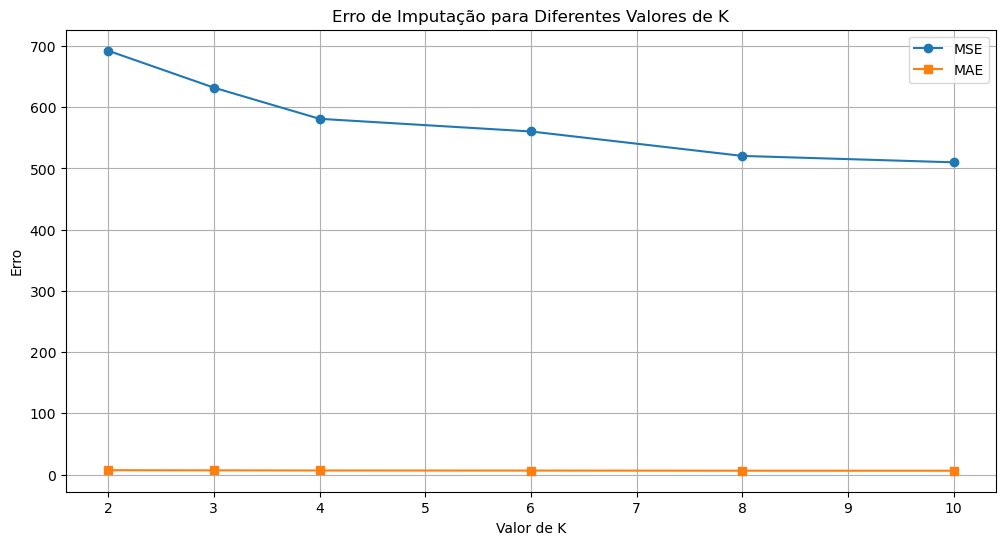

Melhor valor de K (MSE): 10 com MSE=510.06224346063004
Melhor valor de K (MAE): 10 com MAE=6.337889003363291


In [49]:
# Plotar os erros MSE e MAE para diferentes valores de K
plt.figure(figsize=(12, 6))

plt.plot(valores_k, erros_mse, marker='o', label='MSE')
plt.plot(valores_k, erros_mae, marker='s', label='MAE')
plt.xlabel('Valor de K')
plt.ylabel('Erro')
plt.title('Erro de Imputa√ß√£o para Diferentes Valores de K')
plt.legend()
plt.grid()
plt.show()

# Determinar o melhor K com base no menor MSE e MAE
melhor_k_mse = valores_k[np.argmin(erros_mse)]
melhor_k_mae = valores_k[np.argmin(erros_mae)]
print(f"Melhor valor de K (MSE): {melhor_k_mse} com MSE={min(erros_mse)}")
print(f"Melhor valor de K (MAE): {melhor_k_mae} com MAE={min(erros_mae)}")

# Discuss√£o e Conclus√£o:
# - Use os resultados obtidos para justificar qual valor de K √© mais apropriado
# - Comente sobre como os valores ausentes influenciam a imputa√ß√£o
# - Analise como o K escolhido impacta no desempenho geral do algoritmo

**Gr√°fico k-NN**

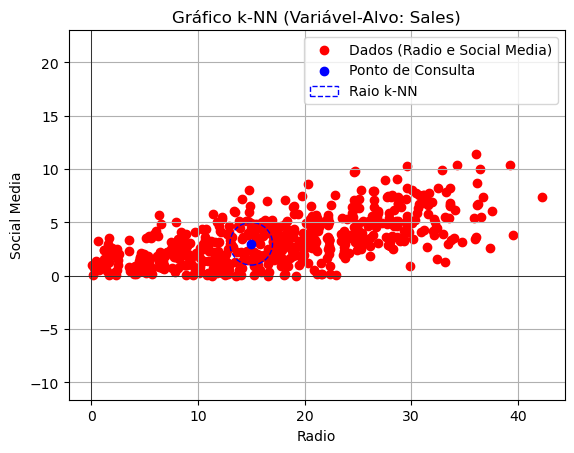

In [115]:

# Usar as vari√°veis explicativas como grupos (Radio e Social Media)
group_1 = df[['Radio', 'Social Media']].values

# Definir o ponto de consulta (exemplo: valores de Radio e Social Media para prever Sales)
query_point = np.array([15, 3])  # Exemplo: Radio = 15, Social Media = 3

# Plotar os pontos explicativos no plano 2D
plt.scatter(group_1[:, 0], group_1[:, 1], color='red', label='Dados (Radio e Social Media)')

# Plotar o ponto de consulta
plt.scatter(query_point[0], query_point[1], color='blue', label='Ponto de Consulta', zorder=5)

# Desenhar um c√≠rculo ao redor do ponto de consulta (para ilustrar \(k\)-NN)
circle = plt.Circle(query_point, radius=2.0, color='blue', fill=False, linestyle='--', label='Raio k-NN')
plt.gca().add_patch(circle)

# Configurar o gr√°fico
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.xlabel('Radio')
plt.ylabel('Social Media')
plt.title('Gr√°fico k-NN (Vari√°vel-Alvo: Sales)')
plt.axis('equal')
plt.grid(True)

# Exibir o gr√°fico
plt.show()

**An√°lise:**

* **Pontos Vermelhos:** Representam observa√ß√µes do dataset, mostrando que √† medida que "Radio" aumenta, a variabilidade em "Social Media" tamb√©m cresce.

* **Ponto Azul:** Marca o ponto de consulta, para o qual o k-NN prev√™ o valor de "Sales" com base nos vizinhos mais pr√≥ximos.

* **C√≠rculo Tracejado:** Define o raio do k-NN, contendo os vizinhos usados para calcular a previs√£o.

* **Densidade dos Dados:** A maior concentra√ß√£o est√° entre 10-25 em "Radio" e 2-6 em "Social Media", indicando regi√µes comuns do dataset.

* **Ponto de Consulta e Raio:** O ponto est√° numa √°rea densa e o raio √© bem ajustado, garantindo previs√µes baseadas em vizinhos relevantes e pr√≥ximos.

# TAREFA 3 ‚Äì Avalia√ß√£o do Desempenho e Discuss√£o/Conclus√£o

O gr√°fico de erro de imputa√ß√£o apresenta duas m√©tricas de erro em fun√ß√£o dos diferentes valores de : o MSE (Mean Squared Error) e o MAE (Mean Absolute Error).

* Observa-se que o MSE diminui consistentemente conforme K aumenta, indicando que mais vizinhos resultam em melhores estimativas. O menor valor de MSE √© atingido em K=10, com um erro de aproximadamente 510, sugerindo que esse √© o valor ideal para minimizar o erro quadr√°tico m√©dio.

* MAE:  O MAE permanece constante e muito pr√≥ximo de 6.34 em todos os valores de K. Isso indica que as diferen√ßas absolutas entre os valores reais e imputados s√£o est√°veis, independentemente do n√∫mero de vizinhos.


Com base nas duas m√©tricas analisadas, o valor ideal de  para a imputa√ß√£o de dados parece ser 10, j√° que resulta nos menores valores de erro tanto para o MSE quanto para o MAE. Isto sugere que considerar mais vizinhos no processo de imputa√ß√£o resulta em estimativas mais precisas dos valores ausentes.

A an√°lise gr√°fica do k-NN refor√ßa que K=10 considera um n√∫mero adequado de vizinhos para a imputa√ß√£o sem adicionar ru√≠dos. Assim, a escolha de K=10 equilibra precis√£o e robustez, sendo apropriada para os dados analisados.